In [1]:
# Generic ones
import numpy as np
import pandas as pd
import os

# Word processing libraries
import re
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

# Widen the size of each cell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import glob
import gzip

# dfs=[]
data = None
total_count=0
keywords_str='#chinavirus|#wuhanvirus|#chopstickflu|#kungfuvirus|#chinesevirus|#kungflu|#communistvirus|#wuhancoronavirus|#coronajihad'
print('filtering by:', keywords_str)

for file in glob.glob("E:\\Projects\\twitter_covid\\2020-04\\*.gz"):
    print(file)
    df = pd.read_json(path_or_buf=file, lines=True, compression='infer')
#     print('Read. Size: ', df.shape)
    
    total_count+=df.shape[0]
    df = df[df['full_text'].str.contains("(?i)"+keywords_str)]
    df.reset_index(inplace = True, drop = True)
    if data is None:
        data = df
    else:
        data = pd.concat([data, df], axis = 0)
        # Reset_index
        data.reset_index(inplace = True, drop = True)
        
data_orig=data.copy()

print('Size of dataset before filtering:', total_count)
print('Size of dataset after filtering:', data.shape[0])



filtering by: #chinavirus|#wuhanvirus|#chopstickflu|#kungfuvirus|#chinesevirus|#kungflu|#communistvirus|#wuhancoronavirus|#coronajihad
E:\Projects\twitter_covid\2020-04\coronavirus-tweet-id-2020-04-01-23.jsonl.gz
E:\Projects\twitter_covid\2020-04\coronavirus-tweet-id-2020-04-02-03.jsonl.gz
E:\Projects\twitter_covid\2020-04\coronavirus-tweet-id-2020-04-02-16.jsonl.gz
E:\Projects\twitter_covid\2020-04\coronavirus-tweet-id-2020-04-02-21.jsonl.gz
E:\Projects\twitter_covid\2020-04\coronavirus-tweet-id-2020-04-03-01.jsonl.gz
E:\Projects\twitter_covid\2020-04\coronavirus-tweet-id-2020-04-04-08.jsonl.gz
E:\Projects\twitter_covid\2020-04\coronavirus-tweet-id-2020-04-05-11.jsonl.gz
E:\Projects\twitter_covid\2020-04\coronavirus-tweet-id-2020-04-07-08.jsonl.gz
E:\Projects\twitter_covid\2020-04\coronavirus-tweet-id-2020-04-08-08.jsonl.gz
E:\Projects\twitter_covid\2020-04\coronavirus-tweet-id-2020-04-08-16.jsonl.gz
E:\Projects\twitter_covid\2020-04\coronavirus-tweet-id-2020-04-09-02.jsonl.gz
E:\Proj

In [3]:
data['hashtags'] = data['entities'].apply(lambda x: x['hashtags'])
data['hashtags'].head(3)

0    [{'text': 'WuhanCoronaVirus', 'indices': [93, ...
1    [{'text': 'WuhanCoronaVirus', 'indices': [29, ...
2    [{'text': 'ChinaVirus19', 'indices': [122, 135]}]
Name: hashtags, dtype: object

In [4]:
# Remove empty tweets
data.dropna(subset = ['full_text'], inplace = True)
# The unicode accounts for Chinese characters and punctuations.
def strip_chinese_words(string):
    # list of english words
    en_list = re.findall(u'[^\u4E00-\u9FA5\u3000-\u303F]', str(string))
    
    # Remove word from the list, if not english
    for c in string:
        if c not in en_list:
            string = string.replace(c, '')
    return string
# Apply strip_chinese_words(...) on the column 'text'
data['full_text'] = data['full_text'].apply(lambda x: strip_chinese_words(x))
data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,withheld_scope,withheld_copyright,withheld_in_countries,hashtags
0,2020-04-01 23:00:01+00:00,1245486103416786944,1245486103416786944,RT @RealJamesWoods: Name a single thing a Demo...,False,"[0, 111]","{'hashtags': [{'text': 'WuhanCoronaVirus', 'in...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,en,{'created_at': 'Wed Apr 01 08:13:02 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'WuhanCoronaVirus', 'indices': [93, ..."
1,2020-04-01 23:00:05+00:00,1245486119770296326,1245486119770296320,Why it deserves to be called #WuhanCoronaVirus...,False,"[0, 206]","{'hashtags': [{'text': 'WuhanCoronaVirus', 'in...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'WuhanCoronaVirus', 'indices': [29, ..."
2,2020-04-01 23:00:25+00:00,1245486204025536512,1245486204025536512,"RT @VishalK20096764: Criminal Negligence,@UN,@...",False,"[0, 140]","{'hashtags': [{'text': 'ChinaVirus19', 'indice...",NaN,"<a href=""http://twitter.com/download/android"" ...",NaN,...,en,{'created_at': 'Wed Apr 01 22:59:54 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'ChinaVirus19', 'indices': [122, 135]}]"
3,2020-04-01 23:18:06+00:00,1245490654563704839,1245490654563704832,RT @ashok_jaswal: @MichaelCoudrey This #Chines...,False,"[0, 140]","{'hashtags': [{'text': 'ChineseVirus', 'indice...",NaN,"<a href=""http://twitter.com/download/android"" ...",NaN,...,en,{'created_at': 'Wed Apr 01 08:09:20 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'ChineseVirus', 'indices': [39, 52]}]"
4,2020-04-01 23:18:20+00:00,1245490712784887808,1245490712784887808,RT @SidneyPowell1: They started the curve in t...,False,"[0, 139]","{'hashtags': [{'text': 'ChineseVirus', 'indice...",NaN,"<a href=""http://twitter.com/download/android"" ...",NaN,...,en,{'created_at': 'Wed Apr 01 21:05:44 +0000 2020...,1.245321e+18,1.245321e+18,"{'url': 'https://t.co/2KhWFlZxIj', 'expanded':...",NaN,NaN,NaN,NaN,"[{'text': 'ChineseVirus', 'indices': [67, 80]}]"


In [5]:
# Define function to sieve out @users in a tweet:
def mentioned_users(string):
    usernames = re.findall('@[^\s]+', string)
    return usernames
# Create a new column and apply the function on the column 'text'
data['mentioned_users'] = data['full_text'].apply(lambda x: mentioned_users(x))
data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,withheld_scope,withheld_copyright,withheld_in_countries,hashtags,mentioned_users
0,2020-04-01 23:00:01+00:00,1245486103416786944,1245486103416786944,RT @RealJamesWoods: Name a single thing a Demo...,False,"[0, 111]","{'hashtags': [{'text': 'WuhanCoronaVirus', 'in...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,{'created_at': 'Wed Apr 01 08:13:02 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'WuhanCoronaVirus', 'indices': [93, ...",[@RealJamesWoods:]
1,2020-04-01 23:00:05+00:00,1245486119770296326,1245486119770296320,Why it deserves to be called #WuhanCoronaVirus...,False,"[0, 206]","{'hashtags': [{'text': 'WuhanCoronaVirus', 'in...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'WuhanCoronaVirus', 'indices': [29, ...",[]
2,2020-04-01 23:00:25+00:00,1245486204025536512,1245486204025536512,"RT @VishalK20096764: Criminal Negligence,@UN,@...",False,"[0, 140]","{'hashtags': [{'text': 'ChinaVirus19', 'indice...",NaN,"<a href=""http://twitter.com/download/android"" ...",NaN,...,{'created_at': 'Wed Apr 01 22:59:54 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'ChinaVirus19', 'indices': [122, 135]}]","[@VishalK20096764:, @UN,@UNHumanRights]"
3,2020-04-01 23:18:06+00:00,1245490654563704839,1245490654563704832,RT @ashok_jaswal: @MichaelCoudrey This #Chines...,False,"[0, 140]","{'hashtags': [{'text': 'ChineseVirus', 'indice...",NaN,"<a href=""http://twitter.com/download/android"" ...",NaN,...,{'created_at': 'Wed Apr 01 08:09:20 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'ChineseVirus', 'indices': [39, 52]}]","[@ashok_jaswal:, @MichaelCoudrey, @DrTedr…]"
4,2020-04-01 23:18:20+00:00,1245490712784887808,1245490712784887808,RT @SidneyPowell1: They started the curve in t...,False,"[0, 139]","{'hashtags': [{'text': 'ChineseVirus', 'indice...",NaN,"<a href=""http://twitter.com/download/android"" ...",NaN,...,{'created_at': 'Wed Apr 01 21:05:44 +0000 2020...,1.245321e+18,1.245321e+18,"{'url': 'https://t.co/2KhWFlZxIj', 'expanded':...",NaN,NaN,NaN,NaN,"[{'text': 'ChineseVirus', 'indices': [67, 80]}]",[@SidneyPowell1:]


In [6]:
# Define Emoji_patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)
# Define the function to implement POS tagging:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Define the main function to clean text in various ways:
def clean_text(text):
    
    # Apply regex expressions first before converting string to list of tokens/words:
    # 1. remove @usernames
    text = re.sub('@[^\s]+', '', text)
    
    # 2. remove URLs
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text)
    
    # 3. remove hashtags entirely i.e. #hashtags
    text = re.sub(r'#([^\s]+)', '', text)
    
    # 4. remove emojis
    text = emoji_pattern.sub(r'', text)
    
    # 5. Convert text to lowercase
    text = text.lower()
    
    # 6. tokenise text and remove punctuation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    
    # 7. remove numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    
    # 8. remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    
    # 9. remove empty tokens
    text = [t for t in text if len(t) > 0]
    
    # 10. pos tag text and lemmatize text
    pos_tags = pos_tag(text)
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    
    # 11. remove words with only one letter
    text = [t for t in text if len(t) > 1]
    
    # join all
    text = " ".join(text)
    
    return(text)
# Apply function on the column 'text':
data['cleaned_text'] = data['full_text'].apply(lambda x: clean_text(x))
data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,withheld_scope,withheld_copyright,withheld_in_countries,hashtags,mentioned_users,cleaned_text
0,2020-04-01 23:00:01+00:00,1245486103416786944,1245486103416786944,RT @RealJamesWoods: Name a single thing a Demo...,False,"[0, 111]","{'hashtags': [{'text': 'WuhanCoronaVirus', 'in...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'WuhanCoronaVirus', 'indices': [93, ...",[@RealJamesWoods:],rt name single thing democrat help fight
1,2020-04-01 23:00:05+00:00,1245486119770296326,1245486119770296320,Why it deserves to be called #WuhanCoronaVirus...,False,"[0, 206]","{'hashtags': [{'text': 'WuhanCoronaVirus', 'in...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'WuhanCoronaVirus', 'indices': [29, ...",[],deserves call \nus intelligence community find...
2,2020-04-01 23:00:25+00:00,1245486204025536512,1245486204025536512,"RT @VishalK20096764: Criminal Negligence,@UN,@...",False,"[0, 140]","{'hashtags': [{'text': 'ChinaVirus19', 'indice...",NaN,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'ChinaVirus19', 'indices': [122, 135]}]","[@VishalK20096764:, @UN,@UNHumanRights]",rt criminal negligence way world deal chinese ...
3,2020-04-01 23:18:06+00:00,1245490654563704839,1245490654563704832,RT @ashok_jaswal: @MichaelCoudrey This #Chines...,False,"[0, 140]","{'hashtags': [{'text': 'ChineseVirus', 'indice...",NaN,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'ChineseVirus', 'indices': [39, 52]}]","[@ashok_jaswal:, @MichaelCoudrey, @DrTedr…]",rt make china export every country help chines...
4,2020-04-01 23:18:20+00:00,1245490712784887808,1245490712784887808,RT @SidneyPowell1: They started the curve in t...,False,"[0, 139]","{'hashtags': [{'text': 'ChineseVirus', 'indice...",NaN,"<a href=""http://twitter.com/download/android"" ...",NaN,...,1.245321e+18,1.245321e+18,"{'url': 'https://t.co/2KhWFlZxIj', 'expanded':...",NaN,NaN,NaN,NaN,"[{'text': 'ChineseVirus', 'indices': [67, 80]}]",[@SidneyPowell1:],rt start curve wrong place month many people a...


In [7]:
# Define a function to perform this extraction:
def extract_hashtags(hashtag_list):
    # argument:
    # hashtag_list - a list of dictionary(ies), each containing a hashtag
    
    # Create a list to store the hashtags
    hashtags = []
    if isinstance(hashtag_list, float):
        hashtag_list=[]
    
    # Loop through the list:
    for i in range(0, len(hashtag_list)):
        # extract the hashtag value using the key - 'text'
        # For our purposes, we can ignore the indices, which tell us the position of the hashtags in the string of tweet
        # lowercase the text as well
        hashtags.append(hashtag_list[i]['text'].lower())
        
    return hashtags
# Apply function on the column - data['hashtags']
data['hashtags'] = data['hashtags'].apply(lambda x: extract_hashtags(x))
# Check out the updated column 'hashtags'
print(data.head()['hashtags'])

0                                 [wuhancoronavirus]
1    [wuhancoronavirus, wuhanvirus, wednesdaywisdom]
2                                     [chinavirus19]
3                                     [chinesevirus]
4                                     [chinesevirus]
Name: hashtags, dtype: object


In [8]:
#Show hashtags
        
data[data['hashtags'].apply(lambda x: True if len(x)>0 else False)]['hashtags']

0                                      [wuhancoronavirus]
1         [wuhancoronavirus, wuhanvirus, wednesdaywisdom]
2                                          [chinavirus19]
3                                          [chinesevirus]
4                                          [chinesevirus]
                              ...                        
3018                                       [chinesevirus]
3019    [chinarisk, chinavirus, coronavirus, ccpvirus,...
3020    [suechina, ccpvirus, lawsuit, chinavirus, 罪魁禍首...
3021    [taiwancanhelp, covid19, chinaliedpeopledied, ...
3022    [chinavirus, chinaliedpeopledied, chinamustfal...
Name: hashtags, Length: 3020, dtype: object

In [9]:
data['location'] = df.user.apply(lambda x: x['location'])
data['acctdesc'] = df.user.apply(lambda x: x['description'])
data[['location','acctdesc']].head(3)

,location,acctdesc
0,,"""China is using coronavirus aid to whitewash i..."
1,India,"Interested in politics, sports."
2,,


In [10]:
# Replace NaN (empty) values with n.a to indicate that the user did not state his location
# Define a function to handle this:
def remove_nan(text):
    if pd.isnull(text) == True: # entry is NaN
        text = 'n.a'
    else:
        # lowercase text for possible easy handling
        text = text.lower()
        
    return text
# Apply function on column - data['location']
data['location'] = data['location'].apply(lambda x: remove_nan(x))
# Check out the updated columns
print(data.head()['location'])
# Let's take a quick look at the value_counts()
data['location'].value_counts()

0                         
1                    india
2                         
3    seal beach (socal-oc)
4               texas, usa
Name: location, dtype: object


n.a                               2979
                                    14
india                                4
worldwide                            2
hong kong                            2
houston                              1
uan, thailand                        1
varanasi                             1
bandung, indonesia                   1
chennai                              1
bengaluru south, india               1
mumbai, india                        1
firenze, toscana                     1
uttar pradesh, india                 1
campinas, brasil                     1
jpn　recesses of a mountain           1
united kingdom                       1
seal beach (socal-oc)                1
#coimbatore #tamilnadu #bharat       1
scotland                             1
cochin, india                        1
united states                        1
earth                                1
भारत                                 1
sydney, new south wales              1
kalbi atayurdunda bir tür

In [11]:
# Apply the function already defined above: remove_nan(...)
# Apply function on column - data['acctdesc']
data['acctdesc'] = data['acctdesc'].apply(lambda x: remove_nan(x))
# Check out the updated columns
print(data.head()['acctdesc'])

0    "china is using coronavirus aid to whitewash i...
1                      interested in politics, sports.
2                                                     
3    law geek(jd)@evictatty,ret’d #leo(#oc-#ca),#ma...
4    love the life you live💕live the life you love🇺...
Name: acctdesc, dtype: object


In [12]:
# Importing VADER from NLTK
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Create a sid object called SentimentIntensityAnalyzer()
sid = SentimentIntensityAnalyzer()
# Apply polarity_score method of SentimentIntensityAnalyzer()
data['sentiment'] = data['cleaned_text'].apply(lambda x: sid.polarity_scores(x))
# Keep only the compound scores under the column 'Sentiment'
data = pd.concat([data.drop(['sentiment'], axis = 1), data['sentiment'].apply(pd.Series)], axis = 1)

In [13]:
# New column: number of characters in 'review'
data['numchars'] = data['cleaned_text'].apply(lambda x: len(x))
# New column: number of words in 'review'
data['numwords'] = data['cleaned_text'].apply(lambda x: len(x.split(" ")))
# Check the new columns:
data.tail(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,mentioned_users,cleaned_text,location,acctdesc,neg,neu,pos,compound,numchars,numwords
3021,2020-04-30 07:59:44+00:00,1255768785044140032,1255768785044140032,So?\nWho cares?\n#TaiwanCanHelp\n#COVID19\n#Ch...,False,"[0, 123]","{'hashtags': [{'text': 'TaiwanCanHelp', 'indic...",NaN,"<a href=""http://twitter.com/download/android"" ...",NaN,...,[],so?\nwho cares?\n\n\n \n\n\n,n.a,n.a,0.0,0.355,0.645,0.563,21,3
3022,2020-04-30 07:59:46+00:00,1255768796259704833,1255768796259704832,#chinavirus #chinaliedpeopledied #chinamustfal...,False,"[0, 248]","{'hashtags': [{'text': 'chinavirus', 'indices'...",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,[],,n.a,n.a,0.0,0.000,0.000,0.000,0,1


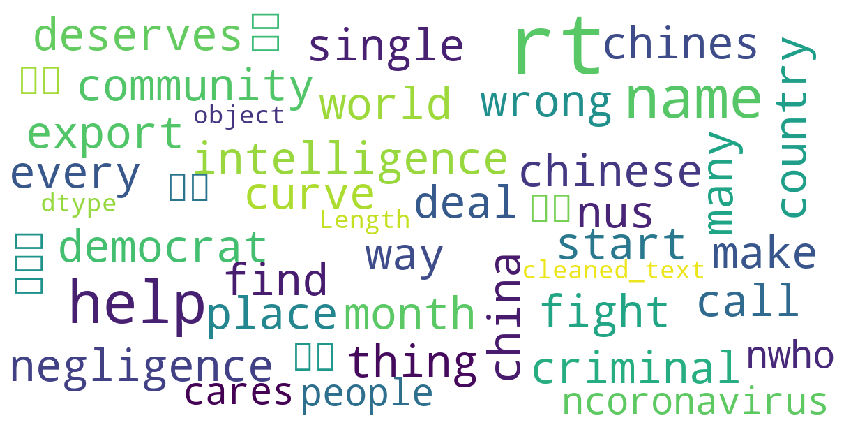

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))
    fig = plt.figure(1, figsize = (15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)
    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(data['cleaned_text'])

In [15]:
# the column data['hashtags'] returns a list of string(s) for each tweet. Build a list of all hashtags in the dataset.
hashtag_list = []
for i in range(0, len(data)):
    # Obtain the current list of hashtags
    curr_hashtag = data.iloc[i, :]['hashtags']
    
    # Extract and append the hashtags to 'hashtag_list':
    for j in range(0, len(curr_hashtag)):
        hashtag_list.append(curr_hashtag[j])
        
# No. of hashtags
print('No. of hashtags used in {} tweets is {}'.format(len(data), len(hashtag_list)))

df_hashtag = pd.DataFrame(
    {'hashtags': hashtag_list}
)
print(df_hashtag.head(20))
print('Shape of df_hashtag is:', df_hashtag.shape)

No. of hashtags used in 3023 tweets is 8927
             hashtags
0    wuhancoronavirus
1    wuhancoronavirus
2          wuhanvirus
3     wednesdaywisdom
4        chinavirus19
5        chinesevirus
6        chinesevirus
7         coronajihad
8       coronajihadis
9          wuhanvirus
10  wholiedpeopledied
11       chinesevirus
12         wuhanvirus
13           sakagibi
14          vaka15422
15           covidー19
16         chinavirus
17         chinavirus
18       chinesevirus
19                who
Shape of df_hashtag is: (8927, 1)


                    hashtags  counts
307             chinesevirus    1048
271               chinavirus     868
1479              wuhanvirus     672
1460        wuhancoronavirus     473
212                    china     343
436                  covid19     285
392              coronavirus     278
242      chinaliedpeopledied     216
197                 ccpvirus     141
308           chinesevirus19     122
1428                     who     120
464                 covid_19     103
189                      ccp      97
1026                  nnevvy      64
1454                   wuhan      63
241       chinaliedpeopledie      58
251             chinamustpay      54
474                 covidー19      54
152             boycottchina      52
372              coronajihad      52
239   chinaliedandpeopledied      50
291      chinesebioterrorism      47
435                    covid      46
311       chineseviruscorona      43
941             makechinapay      42


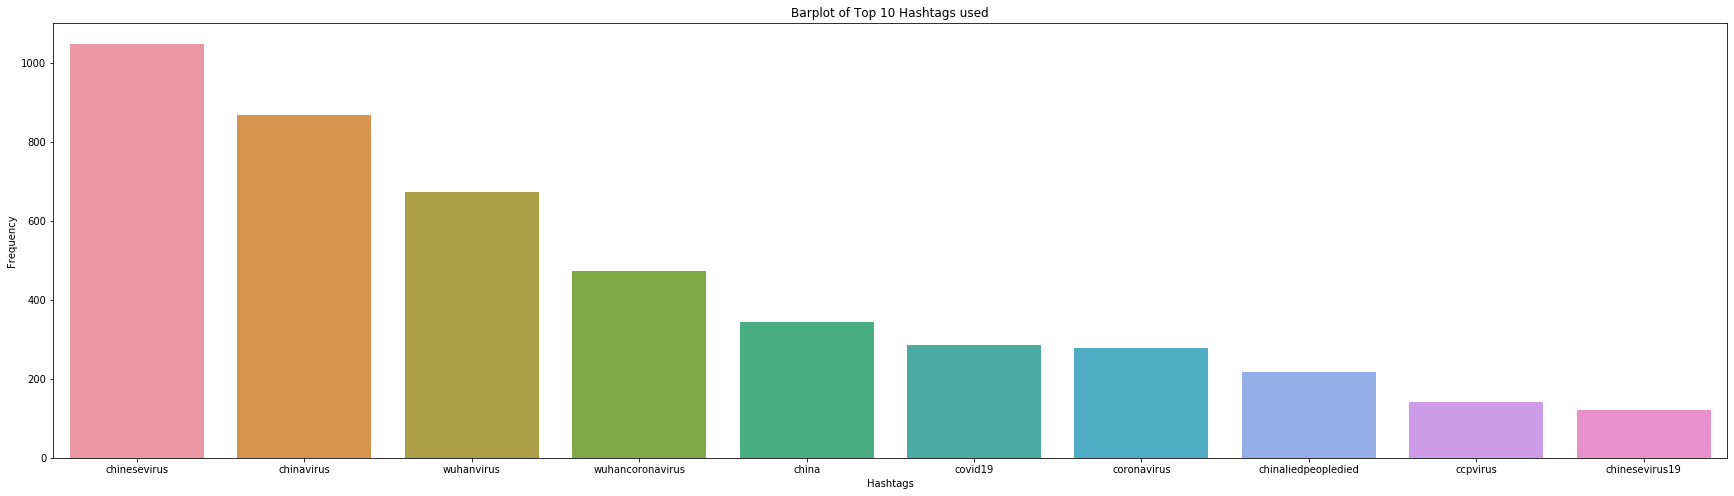

In [16]:
import seaborn as sns

# Define N to be the top number of hashtags
N = 25
top_hashtags = df_hashtag.groupby(['hashtags']).size().reset_index(name = 'counts').sort_values(by = 'counts', ascending = False).head(N)
print(top_hashtags)
# seaborn countplot on the top N hashtags
plt.figure(figsize=(30,8))
sns.set_palette('PuBuGn_d')
sns.barplot(x = 'hashtags', y = 'counts', data = top_hashtags.head(10))
plt.title('Barplot of Top ' + str(10) + ' Hashtags used')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.show()

In [17]:
def isNaN(num):
    return num != num

def get_full_name(x):
    if x is None or isNaN(x):
        return None
    else:
        return x['full_name']
data['place_full_name']=data['place'].apply(lambda x: get_full_name(x))

data[data['place_full_name'].apply(lambda x: x is not None)]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,cleaned_text,location,acctdesc,neg,neu,pos,compound,numchars,numwords,place_full_name
82,2020-04-02 03:26:21+00:00,1245553127429820424,1245553127429820416,Ab aise me desh #corona se jitega aise logo to...,False,"[0, 93]","{'hashtags': [{'text': 'corona', 'indices': [1...","{'media': [{'id': 1245552981770002432, 'id_str...","<a href=""http://twitter.com/download/android"" ...",NaN,...,ab aise desh se jitega aise logo goli maro,n.a,n.a,0.000,1.000,0.000,0.0000,42,9,"Anand, India"
166,2020-04-02 16:09:10+00:00,1245745097154551809,1245745097154551808,The Ram Mandir in Kolkata had categorically in...,False,"[0, 275]","{'hashtags': [{'text': 'ChineseVirus19', 'indi...","{'media': [{'id': 1245745093484507136, 'id_str...","<a href=""http://twitter.com/download/android"" ...",NaN,...,ram mandir kolkata categorically inform devote...,n.a,n.a,0.158,0.731,0.112,-0.0181,157,20,"Kolkata, India"
190,2020-04-02 16:30:02+00:00,1245750347878019072,1245750347878019072,#covid #coronavirus #corona #virus #wuhan #chi...,False,"[0, 248]","{'hashtags': [{'text': 'covid', 'indices': [0,...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",1.245750e+18,...,,n.a,n.a,0.000,0.000,0.000,0.0000,0,1,"Stamford, CT"
198,2020-04-02 16:31:16+00:00,1245750658806034432,1245750658806034432,"more than 450 people were found positive, who ...",False,"[0, 220]","{'hashtags': [{'text': 'COVID19Pandemic', 'ind...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",1.245751e+18,...,people find positive turn become threat entire...,n.a,n.a,0.439,0.370,0.190,-0.5719,80,11,"Dubai, United Arab Emirates"
231,2020-04-02 16:04:43+00:00,1245743974641545216,1245743974641545216,#cdanslair Antoine Flahault (épidémiologiste)\...,False,"[0, 225]","{'hashtags': [{'text': 'cdanslair', 'indices':...","{'media': [{'id': 1245743963748917248, 'id_str...","<a href=""http://twitter.com/download/android"" ...",NaN,...,antoine flahault épidémiologiste)\n-ce serait ...,n.a,n.a,0.119,0.881,0.000,-0.5423,178,26,"Marseille, France"
321,2020-04-03 01:35:11+00:00,1245887540369948674,1245887540369948672,@PDChina I’m the rest of world they’re picking...,False,"[9, 94]","{'hashtags': [{'text': 'ChineseVirus', 'indice...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",1.245881e+18,...,i’m rest world they’re pick funeral flower dead,n.a,n.a,0.531,0.469,0.000,-0.7783,47,8,"Stratford, London"
482,2020-04-05 11:41:29+00:00,1246764895963459585,1246764895963459584,@michaelxpettis @PaulGambles2 @SCMPNews perhap...,False,"[40, 312]","{'hashtags': [{'text': 'china', 'indices': [14...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",1.246681e+18,...,perhaps didn’t listen cuomo’s presser newyork/...,n.a,n.a,0.123,0.877,0.000,-0.4215,173,21,"San Francisco, CA"
755,2020-04-09 02:08:59+00:00,1248070373075292161,1248070373075292160,List of officers in-charge of Noida Hotspots. ...,False,"[0, 254]","{'hashtags': [{'text': 'CoronaCrisis', 'indice...","{'media': [{'id': 1248070355228471296, 'id_str...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,list officer in-charge noida hotspot,n.a,n.a,0.000,1.000,0.000,0.0000,36,5,"Noida, India"
779,2020-04-09 02:31:46+00:00,1248076106931916801,1248076106931916800,@ChinaSpox_India #ChinaVirus\n#WuhanVirusMadeI...,False,"[17, 93]","{'hashtags': [{'text': 'ChinaVirus', 'indices'...",NaN,"<a href=""http://twitter.com/download/android"" ...",1.247778e+18,...,\n\n\n,n.a,n.a,0.000,0.000,0.000,0.0000,3,1,"Karnataka, India"
834,2020-04-09 03:21:41+00:00,1248088669522669571,1248088669522669568,ABC doing Chinas heavy lifting. Nice!! #Chines...,False,"[0, 87]","{'hashtags': [{'text': 'ChineseVirus', 'indice...",NaN,"<a href=""http://twitter.com/download/android"" ...",NaN,...,abc china heavy lifting nice,n.a,n.a,0.000,0.588,0.412,0.4215,28,5,"Seymour, TN"


In [18]:
data[data['coordinates'].apply(lambda x: x is not None)]['coordinates']


925     {'type': 'Point', 'coordinates': [-86.2422, 43...
2075    {'type': 'Point', 'coordinates': [81.10528, 25...
Name: coordinates, dtype: object


Wordcloud for Keyword:  chinesevirus


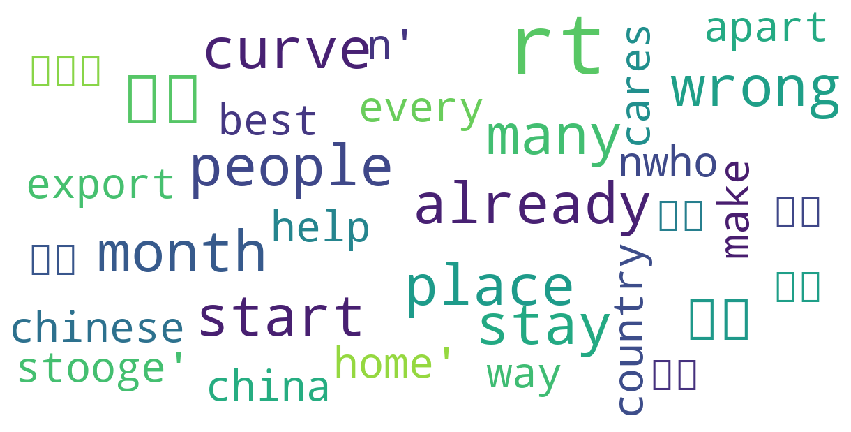


Wordcloud for Keyword:  chinaliedpeopledied


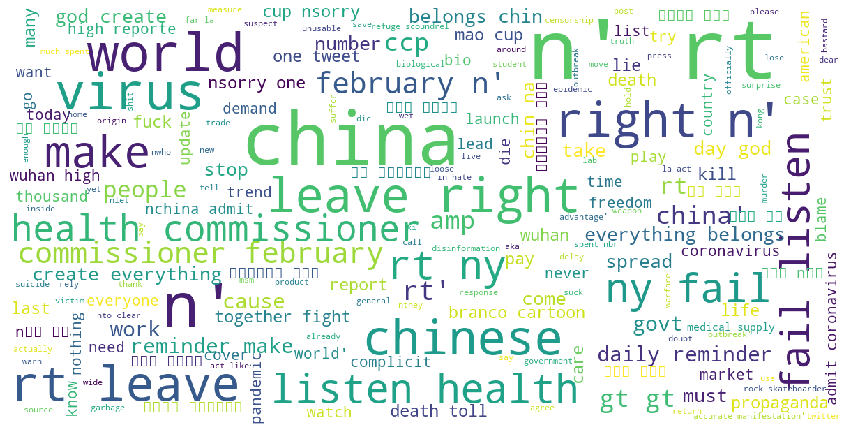


Wordcloud for Keyword:  chinesebioterrorism


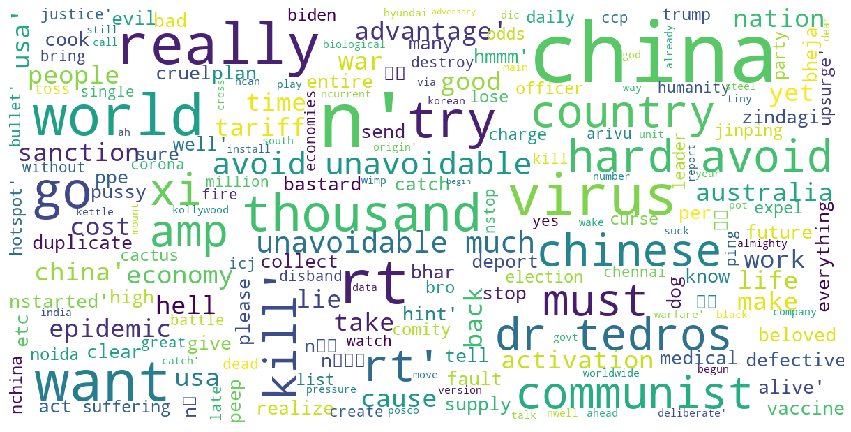


Wordcloud for Keyword:  chinazi


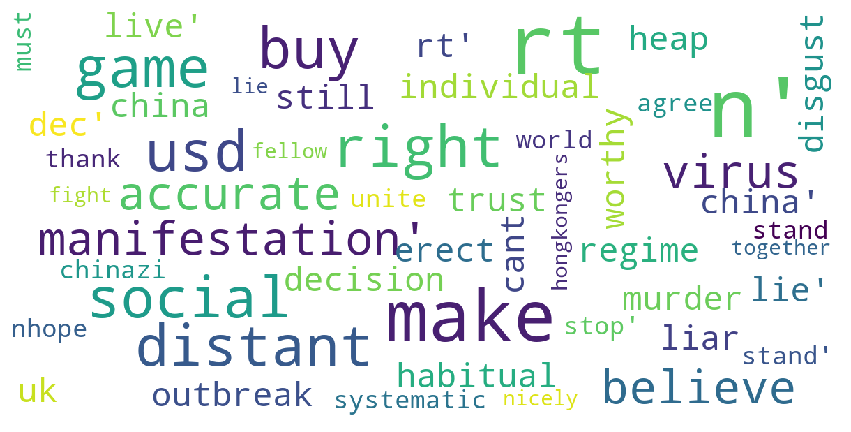

In [19]:
keyword_ts=['chinesevirus','chinaliedpeopledied','chinesebioterrorism','chinazi']
for keyword_t in keyword_ts:
    print('\nWordcloud for Keyword: ', keyword_t)
    df_t = data[data['full_text'].str.contains("(?i)#"+keyword_t)]
    show_wordcloud(df_t['cleaned_text'].values)